In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [16]:
pd.concat([pd.DataFrame(iris.data), pd.DataFrame(iris.target, columns=['ans'])], axis=1).corr()

,0,1,2,3,ans
0,1.000000,-0.109369,0.871754,0.817954,0.782561
1,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
2,0.871754,-0.420516,1.000000,0.962757,0.949043
3,0.817954,-0.356544,0.962757,1.000000,0.956464
ans,0.782561,-0.419446,0.949043,0.956464,1.000000


In [61]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [3]:
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [4]:
from sklearn.cross_validation import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
#標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.linear_model import Perceptron
#エポック数40、学習率0.1でパーセプトロンのインスタンスを作成
ppn = Perceptron(n_iter=40,eta0=0.1,random_state=0,shuffle=True)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [15]:
##誤分類のサンプル個数を表示
y_pred = ppn.predict(X_test_std)
print("Misclassified samples : %d" % (y_test != y_pred).sum())

Misclassified samples : 4


In [20]:
from sklearn.metrics import accuracy_score
#分類の正解率を算出
print('Accuracy : %.2f' % accuracy_score(y_test,y_pred))

Accuracy : 0.91


In [21]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1
    
    #グリッドポイントの生成
    #x1とx2の全ての組み合わせを作る
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                                             np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を１次元配列に変換して予測を実行
    #ravelメソッドはリストを一つのリストにする
    #全ての格子点を分類器に入れて分類する
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #参考
    #np.array([[1,2],[3,4]]).T
    #array([[1, 3],
    # [2, 4]])
    
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    #テストサンプルを目立たせる(丸で表示)
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1],c='',alpha=1.0,linewidths = 1,marker='o',s=55,label='test set')

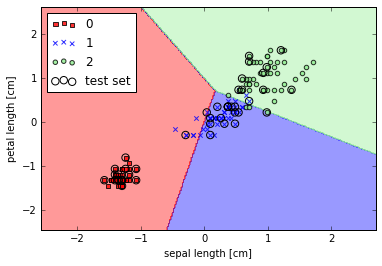

In [30]:
#トレーニングデータとテストデータを縦に積み重ねる
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
#決定境界のプロット
plot_decision_regions(X=X_combined_std,y=y_combined_std,classifier=ppn,test_idx=range(105,150))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [24]:
np.vstack(([1,2],[3,4]))

array([[1, 2],
       [3, 4]])

シグモイド関数

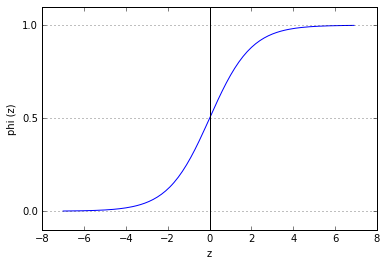

In [32]:
#シグモイド関数を定義
def sigmoid(z):
    return 1.0/ (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
#垂直線を追加
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('phi (z)')
#y軸の目盛を追加
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

ロジスティック回帰モデルのトレーニング

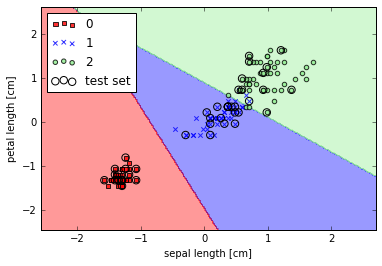

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)
#決定境界のプロット
plot_decision_regions(X=X_combined_std,y=y_combined_std,classifier=lr,test_idx=range(105,150))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [37]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [35]:
X_test_std[0,:]

array([ 0.70793846,  1.50872803])

In [36]:
X_test_std[0,:].reshape(1,-1)

array([[ 0.70793846,  1.50872803]])

In [69]:
##誤分類のサンプル個数を表示
y_pred = lr.predict(X_test_std)
print("Misclassified samples : %d" % (y_test != y_pred).sum())

Misclassified samples : 1


In [71]:
lr.coef_

array([[-2.09336507, -1.76672619],
       [ 1.06011115, -0.84154482],
       [ 1.72637718,  2.36915927]])

In [45]:
ppn.coef_

array([[-0.14874662, -0.11229737],
       [ 0.22431308, -0.20230671],
       [ 0.50351128,  0.28717266]])

In [63]:
lr.classes_

array([0, 1, 2])

ロジスティック回帰　正則化

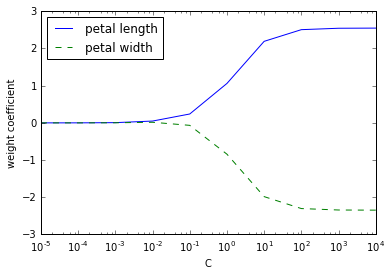

In [47]:
#重み係数と逆正則化パラメータの空のリスト
weights, params = [] , []
#10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    #重み係数を格納(lr.coef_[1]はクラス2かどうかを分類するモデルの重み係数)
    weights.append(lr.coef_[1])
    #逆正則化パラメータを格納
    params.append(10**c)
    
#重み係数をNumpy配列に変換
weights = np.array(weights)
#横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params,weights[:, 0],label='petal length')
plt.plot(params,weights[:, 1],linestyle='--',label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [50]:
np.unique(y_train)

array([0, 1, 2])

In [51]:
y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

サポートベクトルマシーン

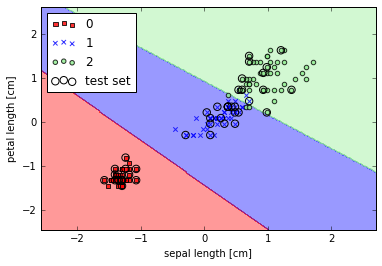

In [80]:
from sklearn.svm import SVC
#線形SVMのインスタンスを生成
svm = SVC(kernel='linear',C=1.0,random_state=0)

svm.fit(X_train_std,y_train)
#決定境界のプロット
plot_decision_regions(X=X_combined_std,y=y_combined_std,classifier=svm,test_idx=range(105,150))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

非線形分類問題のサンプル

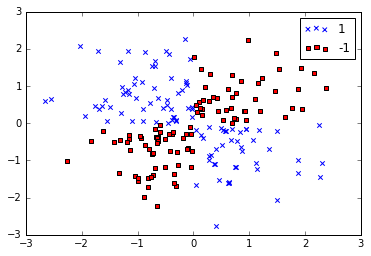

In [79]:
#乱数種を指定
np.random.seed(0)
#標準正規分布に従う乱数で200行2列の行列を作成
X_xor = np.random.randn(200,2)
#2つの引数に対して排他的論理和を実行
#2つの引数が異符号ならTrue
y_xor = np.logical_xor(X_xor[:,  0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

#ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
#ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor== -1,0],X_xor[y_xor== -1,1],c='r',marker='s',label='-1')

#軸の範囲を設定
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

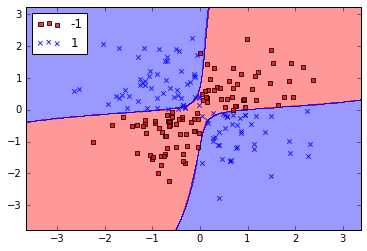

In [81]:
#線形SVMのインスタンスを生成
svm = SVC(kernel='rbf',C=10.0,random_state=0,gamma=0.10)
svm.fit(X_xor,y_xor)
#決定境界のプロット
plot_decision_regions(X=X_xor,y=y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

irisデータに非線形SVMを適用 パラメータの変化を比較

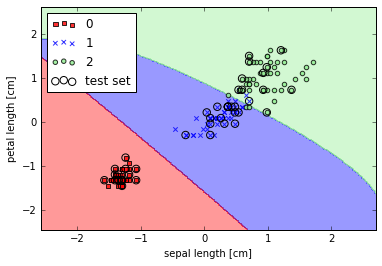

In [89]:
#gamma = 0.2
svm1 = SVC(kernel='rbf',random_state=0,gamma=0.2,C=1.0)
svm1.fit(X_train_std,y_train)
#決定境界のプロット
plot_decision_regions(X=X_combined_std,y=y_combined_std,classifier=svm1,test_idx=range(105,150))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [90]:
##誤分類のサンプル個数を表示
y_pred = svm1.predict(X_test_std)
print("Misclassified samples : %d" % (y_test != y_pred).sum())

Misclassified samples : 1


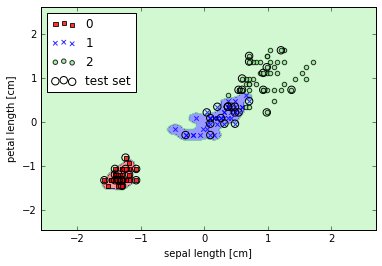

In [91]:
#gamma = 100.0
svm2 = SVC(kernel='rbf',random_state=0,gamma=100.0,C=1.0)
svm2.fit(X_train_std,y_train)
#決定境界のプロット
plot_decision_regions(X=X_combined_std,y=y_combined_std,classifier=svm2,test_idx=range(105,150))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [92]:
##誤分類のサンプル個数を表示
y_pred = svm2.predict(X_test_std)
print("Misclassified samples : %d" % (y_test != y_pred).sum())

Misclassified samples : 9


In [93]:
#ジニ不純度の関数の定義
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1 - p))

#エントロピーの関数を定義
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1-p))

#分類誤差の関数を定義
def error(p):
    return 1 - np.max([p,1-p])  

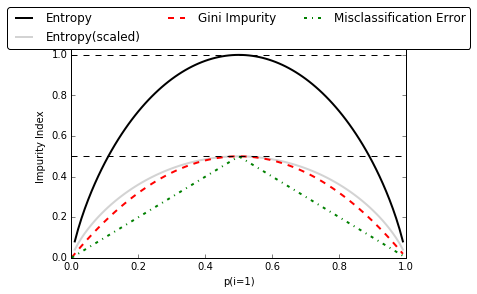

In [107]:
x = np.arange(0.0,1.0,0.01)
#配列の値をもとにエントロピー、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
#entの1/2
sc_ent = [e*0.5 if e else None for e in ent]
#分類誤差
err = [error(i) for i in x]

##図の作成
fig = plt.figure()
#subplot(111)は(行数、列数、何番目のプロットか)を表す
ax = plt.subplot(111)
#エントロピー2種、ジニ不純度、分類誤差のそれぞれをループ処理
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],['Entropy','Entropy(scaled)','Gini Impurity','Misclassification Error'],
                                                     ['-','-','--','-.'],['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label=lab, linestyle=ls, lw=2, color=c)

#凡例の設定
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),
         ncol=3,fancybox=True,shadow=False)
#2本の水平の波線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
#横軸の上限下限を設定
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

上図からどの不純度条件もクラスラベルiの割合が0.5になる時、不純度は最大になる
(分かれ方の一塊についての議論　※目的関数の話ではないことに注意)

In [108]:
print(ent[1])

0.0807931358959


In [103]:
x

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99])

決定木の構築

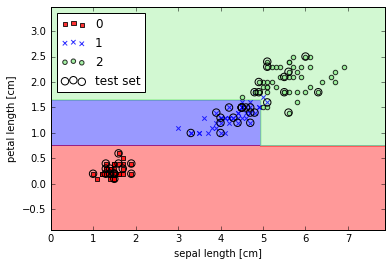

In [109]:
from sklearn.tree import DecisionTreeClassifier
#エントロピーを指標とする決定木のインスタンスを作成
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [111]:
#誤分類の数
y_pred = tree.predict(X_test)
(y_test != y_pred).sum()

1

In [114]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

ランダムフォレスト実装

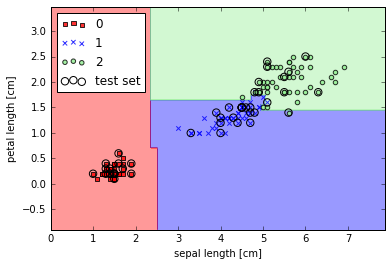

In [116]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [117]:
#誤分類の数
y_pred = tree.predict(X_test)
(y_test != y_pred).sum()

1

k近傍法

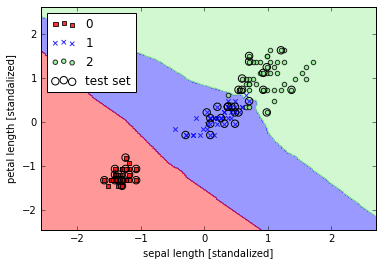

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('sepal length [standalized]')
plt.ylabel('petal length [standalized]')
plt.legend(loc='upper left')
plt.show()

In [121]:
#誤分類の数
y_pred = tree.predict(X_test)
(y_test != y_pred).sum()

1